# **Problem statement**
##### Building a model that can best predict the risk of diabetes progression. This will be used as a screening tool to help physicians with identifying patients at risk. The models that we look into are:
##### 1. Univariate polynomial regression models
##### 2. Multivariate Polynomial models
##### 3. Decision Trees
##### 4. kNNs
##### In this lab we will evaluate the models using [R-squared](https://en.wikipedia.org/wiki/Coefficient_of_determination), Mean Absolute Percentage Error [MAPE](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error) and Mean Absolute Error [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) metrics. To do that we will run a train-validation-test split.

# Part 1

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from typing import List
from sklearn import tree


# 1. **Getting the Data**
### We can download the [BMI dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) to load it into our system 

In [99]:
BMI_JB = datasets.load_diabetes(as_frame=True)
X, y = BMI_JB.data, BMI_JB.target


In [100]:
print(y)

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64


# 2. Frame the Problem. Notice that the dependent variable of diabetes progression, namely "disease progression one year after baseline". 

### Therefore, he following report aims to explore the relationship between the dependent variable (disease progression one year after baseline) and various independent variables in the Diabetes dataset. The objective is to build models that effectively predict the risk of diabetes progression. The models to be evaluated include univariate polynomial regression models, multivariate polynomial models, decision trees, and k-nearest neighbors (kNN).

# 3. **Exploratory Data Analysis (EDA)**
### Describe the data, explore it, and provide insights about it. This should include at least: statistics, scatter plots histograms, a correlation matrix, and concise and relevant insights

### 3.1 **Statistics of dataset**

In [101]:
print(X.describe())
print(y.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17  
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761

# 3.2 **Scatter plot**

#### 1. *disease progression* vs *BMI*

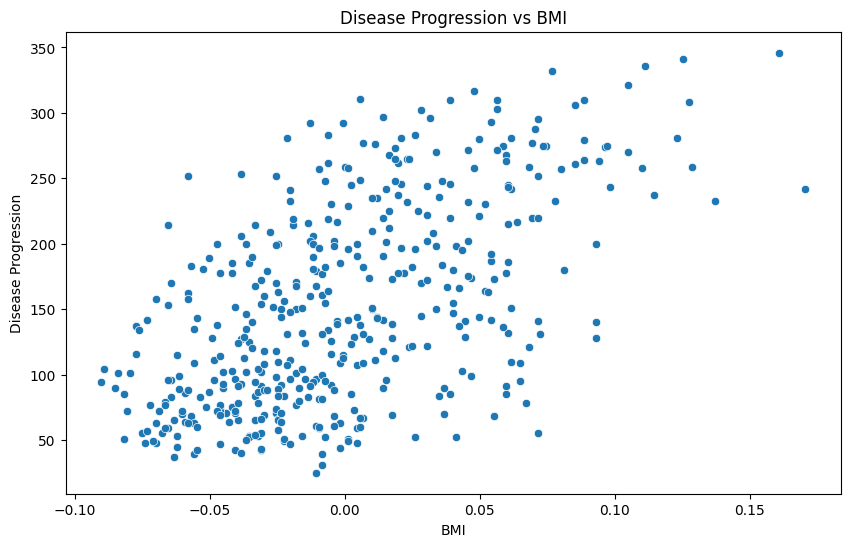

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X["bmi"], y=y)
plt.title("Disease Progression vs BMI")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.show()



# Correlation Matrix

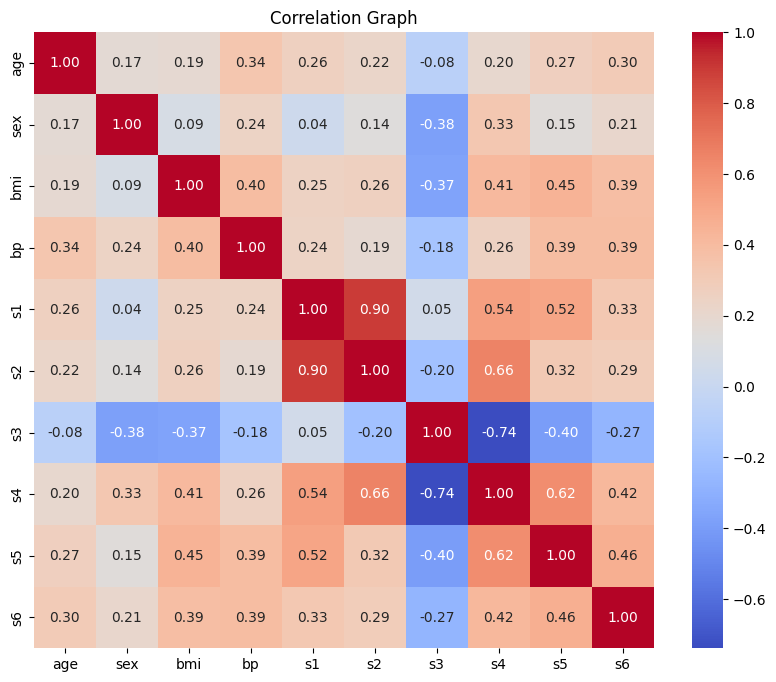

                          age       sex       bmi        bp        s1  \
age                  1.000000  0.173737  0.185085  0.335428  0.260061   
sex                  0.173737  1.000000  0.088161  0.241010  0.035277   
bmi                  0.185085  0.088161  1.000000  0.395411  0.249777   
bp                   0.335428  0.241010  0.395411  1.000000  0.242464   
s1                   0.260061  0.035277  0.249777  0.242464  1.000000   
s2                   0.219243  0.142637  0.261170  0.185548  0.896663   
s3                  -0.075181 -0.379090 -0.366811 -0.178762  0.051519   
s4                   0.203841  0.332115  0.413807  0.257650  0.542207   
s5                   0.270774  0.149916  0.446157  0.393480  0.515503   
s6                   0.301731  0.208133  0.388680  0.390430  0.325717   
disease_progression  0.187889  0.043062  0.586450  0.441482  0.212022   

                           s2        s3        s4        s5        s6  \
age                  0.219243 -0.075181  0.203841 

In [103]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt= ".2f")
plt.title("Correlation Graph")
plt.show()


df_corr = pd.concat([X, y.rename('disease_progression')], axis=1)
print(df_corr.corr())

##### The features bmi, bp(blood pressure), s4(total cholesterol / HDL),s5(possibly log of serum triglycerides level) show significant positive relationship with the suppport of scatter plot of Disease Progression vs BMI according to our problem statement


# 3.3 Description of Variables:
## - Dependent variable
###    `disease_progression`: The median value of houses in a given area, appended as dependent variable in our analysis.
## - Independent variable
###    `age`,`sex`,`bmi`,`bp`,`s1`,`s2`,`s3`,`s4`,`s5`,`s6`


# 4. Data Preprocessing
### Checked out graphs with every variable and checked for null values


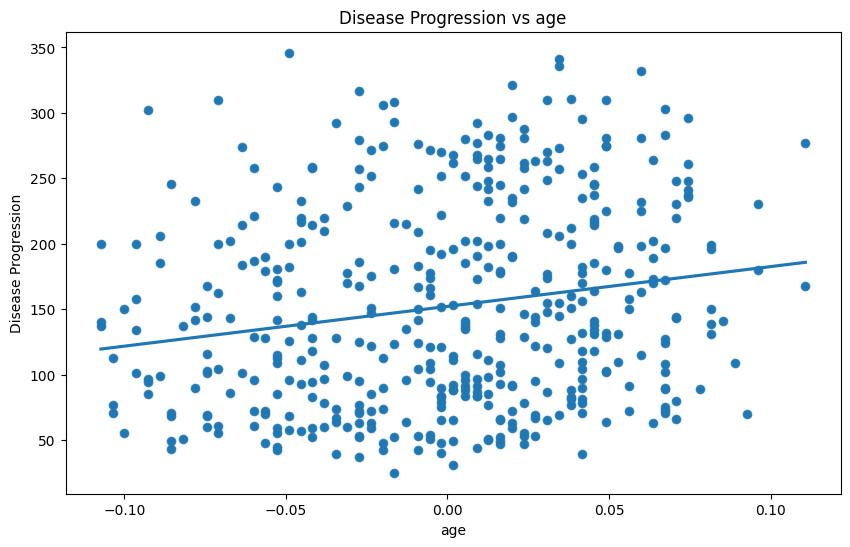

In [141]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X["age"], y=y)
sns.regplot(x=X["age"], y=y, ci=None)  
plt.title("Disease Progression vs age")
plt.xlabel("age")
plt.ylabel("Disease Progression")
plt.show()

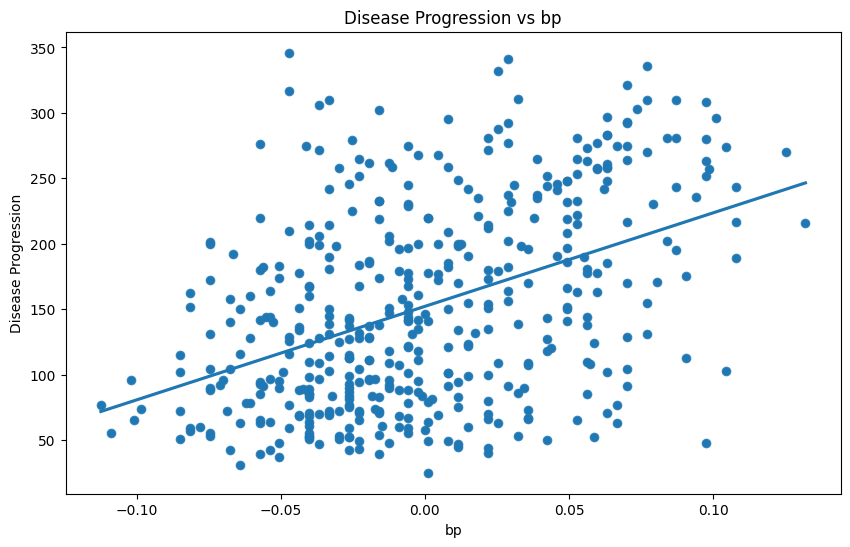

In [108]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X["bp"], y=y)
sns.regplot(x=X["bp"], y=y, ci=None)
plt.title("Disease Progression vs bp")
plt.xlabel("bp")
plt.ylabel("Disease Progression")
plt.show()

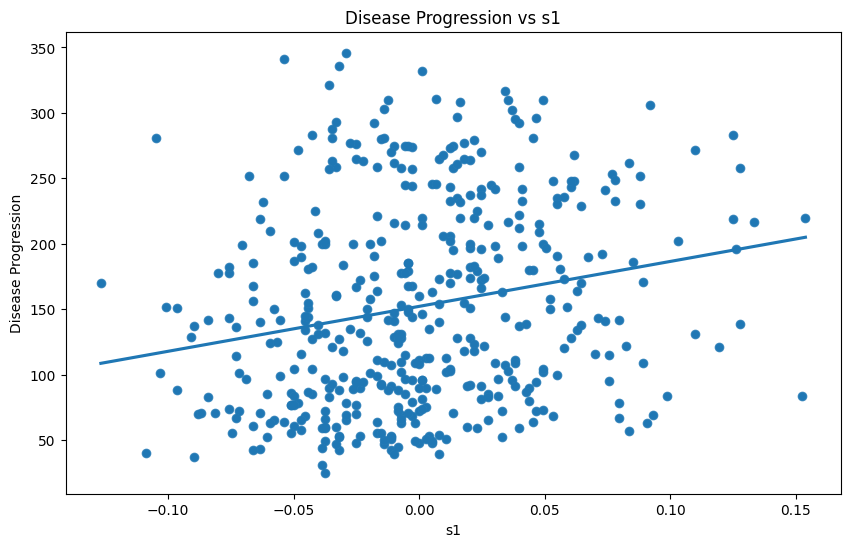

In [109]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X["s1"], y=y)
sns.regplot(x=X["s1"], y=y, ci=None)
plt.title("Disease Progression vs s1")
plt.xlabel("s1")
plt.ylabel("Disease Progression")
plt.show()

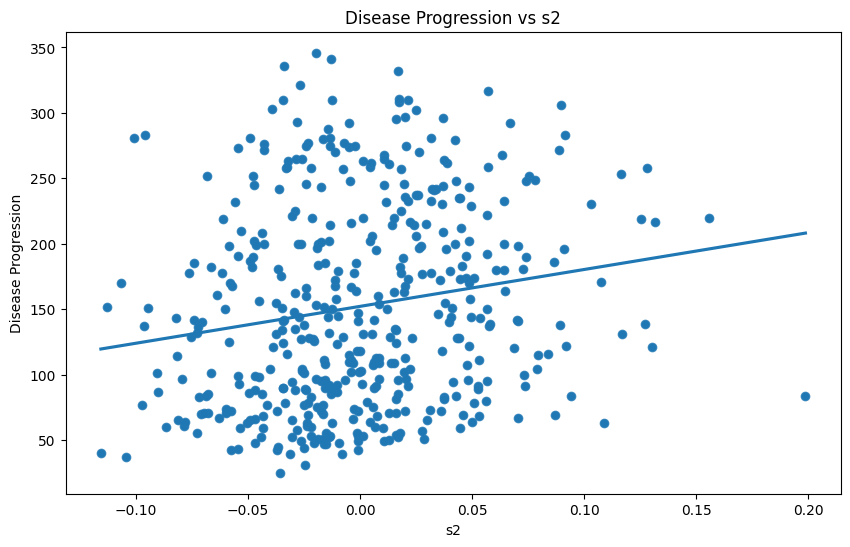

In [110]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X["s2"], y=y)
sns.regplot(x=X["s2"], y=y, ci=None)
plt.title("Disease Progression vs s2")
plt.xlabel("s2")
plt.ylabel("Disease Progression")
plt.show()

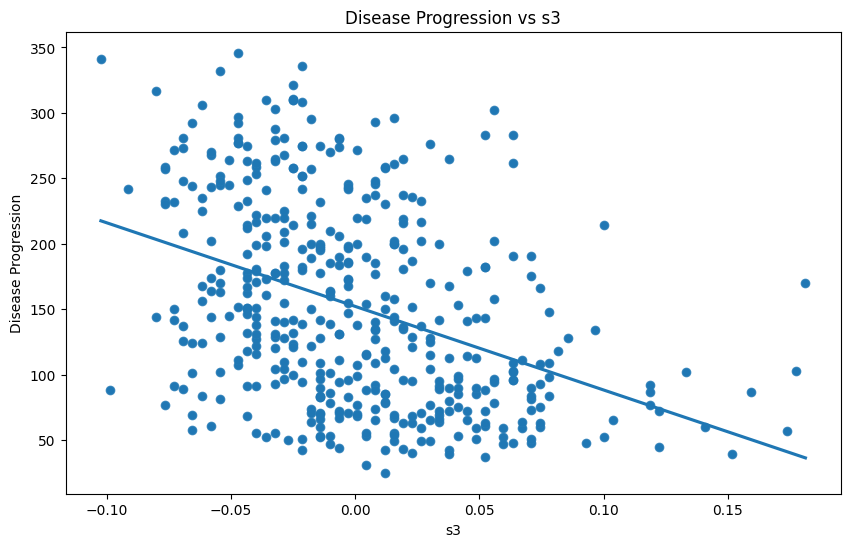

In [111]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X["s3"], y=y)
sns.regplot(x=X["s3"], y=y, ci=None)
plt.title("Disease Progression vs s3")
plt.xlabel("s3")
plt.ylabel("Disease Progression")
plt.show()

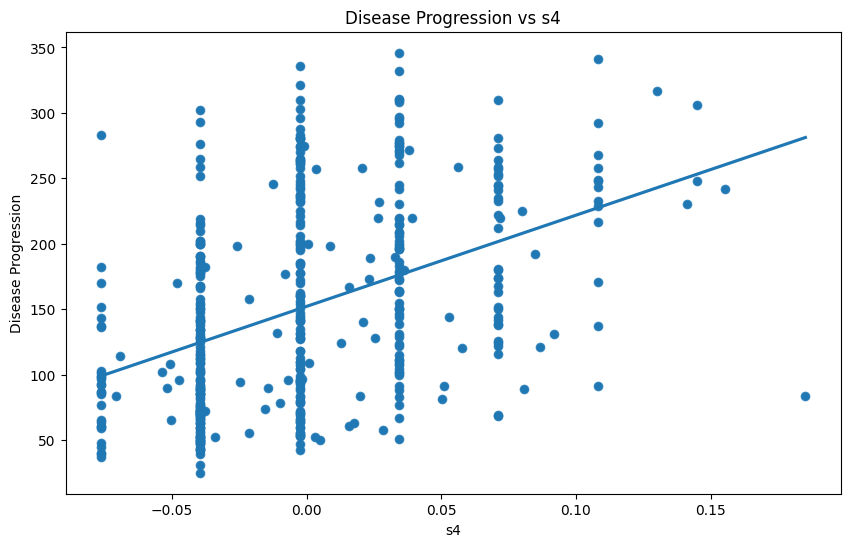

In [112]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X["s4"], y=y)
sns.regplot(x=X["s4"], y=y, ci=None)
plt.title("Disease Progression vs s4")
plt.xlabel("s4")
plt.ylabel("Disease Progression")
plt.show()

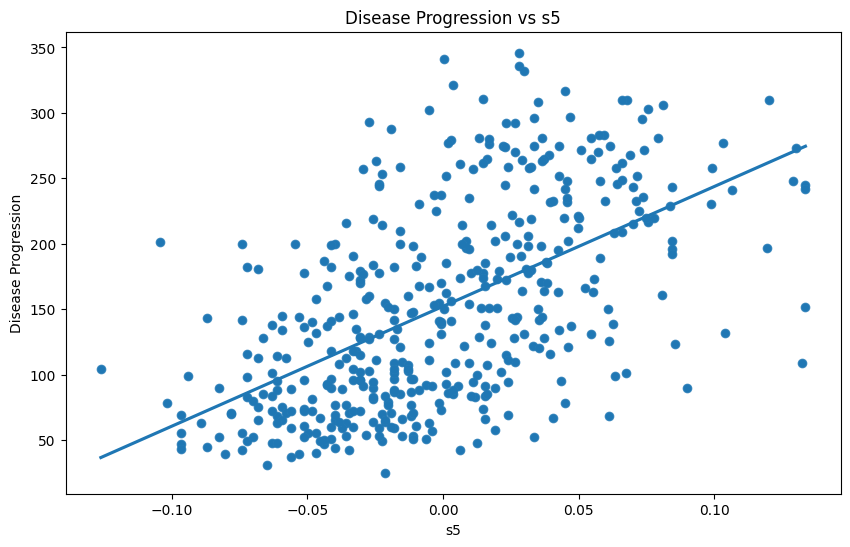

In [113]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X["s5"], y=y)
sns.regplot(x=X["s5"], y=y, ci=None)
plt.title("Disease Progression vs s5")
plt.xlabel("s5")
plt.ylabel("Disease Progression")
plt.show()

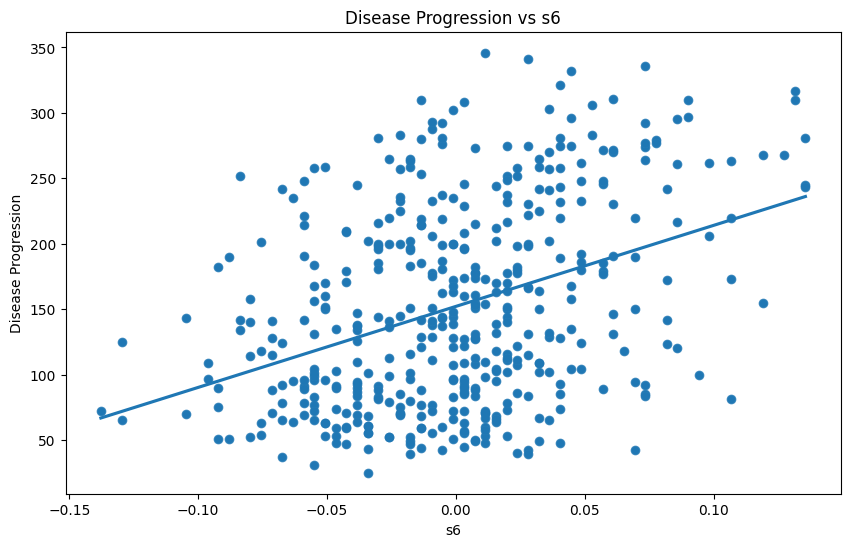

In [114]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X["s6"], y=y)
sns.regplot(x=X["s6"], y=y, ci=None)
plt.title("Disease Progression vs s6")
plt.xlabel("s6")
plt.ylabel("Disease Progression")
plt.show()

In [115]:
print(X.isnull().sum())
print(y.isnull().sum())


age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64
0


##### Since there was not anything unusual with graphs and correlation matrix also there was no null values 

# 5. Train and Test Split

### Split the dataset to a train (75%) and validation set (10%), and test set (15%).

In [116]:
X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

In [117]:
print(len(X_train))
print(len(X_temp))
print(len(y_train))
print(len(y_temp))
print(len(X_val))
print(len(X_test))
print(len(y_val))
print(len(y_test))

331
111
331
111
44
67
44
67


# Part 2 

# 6. Models: a univariate polynomial regression on the BMI feature versus the "disease progression one year after baseline" - from degree 0 to 5 (6 models)

In [118]:
results = {
    "Degree": [],
    "Train R^2": [],
    "Validation R^2": [],
    "Train MAE": [],
    "Validation MAE": [],
    "Train MAPE": [],
    "Validation MAPE": [],
}

for degree in range(6):
    poly = PolynomialFeatures(degree=degree)
    X_train_bmi = poly.fit_transform(X_train[['bmi']])
    X_val_bmi = poly.transform(X_val[['bmi']])
    
    model = LinearRegression()
    model.fit(X_train_bmi, y_train)
    
    y_train_pred = model.predict(X_train_bmi)
    y_val_pred = model.predict(X_val_bmi)

    results["Degree"].append(degree)
    results["Train R^2"].append(r2_score(y_train, y_train_pred))
    results["Validation R^2"].append(r2_score(y_val, y_val_pred))
    results["Train MAE"].append(mean_absolute_error(y_train, y_train_pred))
    results["Validation MAE"].append(mean_absolute_error(y_val, y_val_pred))
    results["Train MAPE"].append(np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100)
    results["Validation MAPE"].append(np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100)
    
results_df = pd.DataFrame(results)
results_df
    

,Degree,Train R^2,Validation R^2,Train MAE,Validation MAE,Train MAPE,Validation MAPE
0,0,0.000000,-0.106957,66.201641,66.057059,62.826669,71.263880
1,1,0.349672,0.331264,52.287739,47.208472,48.362886,47.060009
2,2,0.350764,0.331631,52.207314,47.213700,48.298534,47.239667
3,3,0.350774,0.331638,52.198968,47.185414,48.280744,47.222673
4,4,0.353014,0.340758,52.092653,46.090118,48.053266,46.050330
5,5,0.354100,0.349881,52.059191,45.462121,48.004022,45.175275



# 7. Compare the models using the training and validation data. Construct a table summarizing the train validation results. Each model should have a separate row in the table:
##### 1. R-Squared
##### As increase in R^2 in training  shows gradual improvement in fit as degree increases with complex models while in validation set, it doesn't portrays any significant improvement and a minor decrease at higher degrees after degree 4.
##### 2. Mean Absolute Error (MAE)
##### MAE in training data shows a gradual decrease as the degree of the model increases, indicating better performance in both train and validation datasets.
##### 3. MAPE
##### Similarly, values in MAPE values show a dip in trend for both trainn and validation datasets upto degree 5, suggest enhanced performance

# 8. Identify the best model based on the table above.

##### Looking at the table results, it seems that as model complexity increases, there is an improvement in both training and validation sets, with degree of 5 model demonstrating  a major performance overall according to R^2 and MAE

# 9. Run the chosen model on the test set and provide results (R-Squared, MAPE, MAE)

In [119]:
poly = PolynomialFeatures(degree=5)
X_test_bmi = poly.fit_transform(X_test[['bmi']])

best_model = LinearRegression()
best_model.fit(X_train_bmi, y_train)

y_test_pred = best_model.predict(X_test_bmi)

test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

print(f"Took best model of degree '5'\nTest R^2: {test_r2},\nTest MAE: {test_mae}, \nTest MAPE: {test_mape}")

Took best model of degree '5'
Test R^2: 0.26669658449530775,
Test MAE: 51.75025709277397, 
Test MAPE: 43.02671323305443


In [120]:
results["Degree"].append(degree)
results["Degree"].append(degree)
results["Train R^2"].append(r2_score(y_train, y_train_pred))
results["Validation R^2"].append(r2_score(y_val, y_val_pred))
results["Train MAE"].append(mean_absolute_error(y_train, y_train_pred))
results["Validation MAE"].append(mean_absolute_error(y_val, y_val_pred))
results["Train MAPE"].append(np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100)
results["Validation MAPE"].append(np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100)
    

In [121]:
print(results)

{'Degree': [0, 1, 2, 3, 4, 5, 5, 5], 'Train R^2': [0.0, 0.34967185121455036, 0.3507638912961787, 0.3507739717064434, 0.3530137354946927, 0.3541002641813574, 0.3541002641813574], 'Validation R^2': [-0.10695658646940309, 0.33126358919280885, 0.33163059113292626, 0.3316375420464187, 0.3407583945439766, 0.34988122550535306, 0.34988122550535306], 'Train MAE': [np.float64(66.20164109491516), np.float64(52.28773945157054), np.float64(52.20731378788719), np.float64(52.19896750707647), np.float64(52.09265315815546), np.float64(52.05919085943837), np.float64(52.05919085943837)], 'Validation MAE': [np.float64(66.05705850041198), np.float64(47.20847217273694), np.float64(47.21369996491131), np.float64(47.185413892618996), np.float64(46.09011849968036), np.float64(45.4621212276793), np.float64(45.4621212276793)], 'Train MAPE': [np.float64(62.82666949166479), np.float64(48.3628861563456), np.float64(48.298534457931424), np.float64(48.28074375642864), np.float64(48.053266051672736), np.float64(48.004

# 10. Plot a graph of the train, validation and test data points, and the fit of the chosen model over each of them

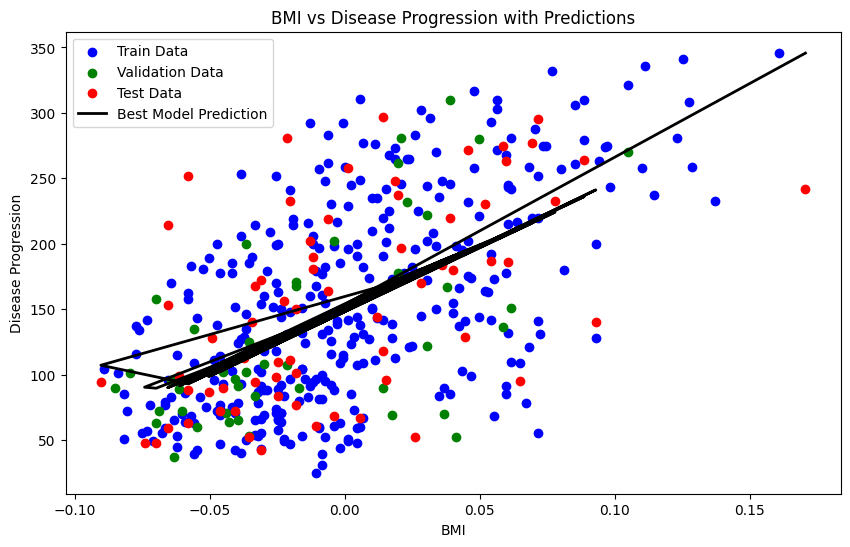

In [122]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train['bmi'], y_train, color='blue', label='Train Data')
plt.scatter(X_val['bmi'], y_val, color='green', label='Validation Data')
plt.scatter(X_test['bmi'], y_test, color='red', label='Test Data')
plt.plot(X_test['bmi'], y_test_pred, color='black', linewidth=2, label='Best Model Prediction')
plt.title("BMI vs Disease Progression with Predictions")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.legend()
plt.show()

# 11. Write down the equation of the best model (with a two decimal digit precision, assuming it's sufficient)

In [123]:

degree = 5  
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train[['bmi']]) 


model = LinearRegression()
model.fit(X_train_poly, y_train)

coefficients = best_model.coef_
intercept = best_model.intercept_

equation = f"y = {intercept:.2f}"
terms = []

for i in range(1, len(coefficients)):
    term = f"{coefficients[i]:.2f} * bmi^{i}"
    terms.append(term)

equation += " + " + " + ".join(terms)

print("The equation of the best model is:")
print(equation)

The equation of the best model is:
y = 153.65 + 1059.89 * bmi^1 + -3824.15 * bmi^2 + -16770.23 * bmi^3 + 753722.52 * bmi^4 + -2993716.57 * bmi^5


# 12. Calculate the expected diabetes progression for a BMI value of your choice using `model.perdict()` for that value

In [124]:
chosen_bmi = input("enter the BMI value ")  
bmi_poly = poly.transform([[chosen_bmi]])
predicted_progression = best_model.predict(bmi_poly)
print(f"Predicted disease progression for BMI {chosen_bmi}: {predicted_progression[0]}")


Predicted disease progression for BMI 60: -2318149399660962.5


c:\Users\jaivb\OneDrive\Desktop\Foundational\venv\CSCN8010_classical_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


# 13. How many trainable parameters are we fitting for each of the models? Explain these values. One way is to use sklearn function `get_feature_names_out()`

In [125]:
features_names = poly.get_feature_names_out(input_features=["bmi"])

num_parameters = len(model.coef_) + 1  # +1 for the intercept

print(f"Number of trainable parameters: {num_parameters}")
print(f"Feature names: {features_names}")

Number of trainable parameters: 7
Feature names: ['1' 'bmi' 'bmi^2' 'bmi^3' 'bmi^4' 'bmi^5']


# 14. Provide a conclusion section. In particular, do a deep dive on where the model fails, and add a short section in the conclusions that describes the model limitations. This should be in addition to summarizing it performance.

#### The depiction of effectively models the relationship between BMI and diabetes progression as:
#### - The selected model has the lowest error metrics
#### - Has the highest predictive capability according to R^2

#### Secondly, the limitations can be constraints emerge in the models's capacity to generalize among various input features. 

#### Lastly, integrating more attributes may enhance the predictions

# Part 3

# In this part, use all features in the dataset, or drop some features per your discretion based on the EDA.


##### Using all the features as per my EDA and conclusion 

In [126]:
diabetes_data = datasets.load_diabetes(as_frame=True)
X, y = diabetes_data.data, diabetes_data.target

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

# Repeat the steps in part 2 for the following models:
#    1. Two polynomial models (degrees >1, of your choice)


# Model 1 with `degree` = 2

In [127]:
results = {
    "Degree": [],
    "Train R^2": [],
    "Validation R^2": [],
    "Train MAE": [],
    "Validation MAE": [],
    "Train MAPE": [],
    "Validation MAPE": [],
}

degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_bmi = poly.fit_transform(X_train[['bmi']])
X_val_bmi = poly.transform(X_val[['bmi']])
    
model = LinearRegression()
model.fit(X_train_bmi, y_train)
    
y_train_pred = model.predict(X_train_bmi)
y_val_pred = model.predict(X_val_bmi)

results["Degree"].append(degree)
results["Train R^2"].append(r2_score(y_train, y_train_pred))
results["Validation R^2"].append(r2_score(y_val, y_val_pred))
results["Train MAE"].append(mean_absolute_error(y_train, y_train_pred))
results["Validation MAE"].append(mean_absolute_error(y_val, y_val_pred))
results["Train MAPE"].append(np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100)
results["Validation MAPE"].append(np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100)
    
results_df_1 = pd.DataFrame(results)
results_df_1

,Degree,Train R^2,Validation R^2,Train MAE,Validation MAE,Train MAPE,Validation MAPE
0,2,0.350764,0.331631,52.207314,47.2137,48.298534,47.239667


# Model 2 with `degree` = 3

In [128]:
results = {
    "Degree": [],
    "Train R^2": [],
    "Validation R^2": [],
    "Train MAE": [],
    "Validation MAE": [],
    "Train MAPE": [],
    "Validation MAPE": [],
}
degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_bmi = poly.fit_transform(X_train[['bmi']])
X_val_bmi = poly.transform(X_val[['bmi']])
    
model = LinearRegression()
model.fit(X_train_bmi, y_train)
    
y_train_pred = model.predict(X_train_bmi)
y_val_pred = model.predict(X_val_bmi)

results["Degree"].append(degree)
results["Train R^2"].append(r2_score(y_train, y_train_pred))
results["Validation R^2"].append(r2_score(y_val, y_val_pred))
results["Train MAE"].append(mean_absolute_error(y_train, y_train_pred))
results["Validation MAE"].append(mean_absolute_error(y_val, y_val_pred))
results["Train MAPE"].append(np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100)
results["Validation MAPE"].append(np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100)
    
results_df_2 = pd.DataFrame(results)
results_df_2

,Degree,Train R^2,Validation R^2,Train MAE,Validation MAE,Train MAPE,Validation MAPE
0,3,0.350774,0.331638,52.198968,47.185414,48.280744,47.222673


#    2. Two decision trees (e.g. consider changing the `max_depth` hyperparameter)


# For default `max_depth`

In [129]:
dt_model1 = DecisionTreeRegressor()
dt_model1.fit(X_train, y_train)

y_train_dt1_pred = dt_model1.predict(X_train)
y_val_dt1_pred = dt_model1.predict(X_val)

dt1_results = {
    "Train R^2": r2_score(y_train, y_train_dt1_pred),
    "Validation R^2": r2_score(y_val, y_val_dt1_pred),
    "Train MAE": mean_absolute_error(y_train, y_train_dt1_pred),
    "Validation MAE": mean_absolute_error(y_val, y_val_dt1_pred),
}

print("Decision Tree (Default Max Depth) Results:", dt1_results)


Decision Tree (Default Max Depth) Results: {'Train R^2': 1.0, 'Validation R^2': -0.27475644342030825, 'Train MAE': np.float64(0.0), 'Validation MAE': np.float64(58.54545454545455)}


[Text(0.5957483628216912, 0.9722222222222222, 'x[2] <= 0.005\nsquared_error = 6044.625\nsamples = 331\nvalue = 154.344'),
 Text(0.33221363740808824, 0.9166666666666666, 'x[8] <= 0.006\nsquared_error = 3735.274\nsamples = 197\nvalue = 119.787'),
 Text(0.46398100011488974, 0.9444444444444444, 'True  '),
 Text(0.1683794806985294, 0.8611111111111112, 'x[8] <= -0.043\nsquared_error = 2507.936\nsamples = 140\nvalue = 101.514'),
 Text(0.08731617647058823, 0.8055555555555556, 'x[4] <= -0.039\nsquared_error = 1500.028\nsamples = 45\nvalue = 80.289'),
 Text(0.06139705882352941, 0.75, 'x[4] <= -0.046\nsquared_error = 1754.13\nsamples = 26\nvalue = 93.846'),
 Text(0.04485294117647059, 0.6944444444444444, 'x[0] <= -0.0\nsquared_error = 1073.407\nsamples = 22\nvalue = 82.045'),
 Text(0.029411764705882353, 0.6388888888888888, 'x[9] <= -0.014\nsquared_error = 720.359\nsamples = 16\nvalue = 73.875'),
 Text(0.022058823529411766, 0.5833333333333334, 'x[5] <= -0.08\nsquared_error = 650.391\nsamples = 13\n

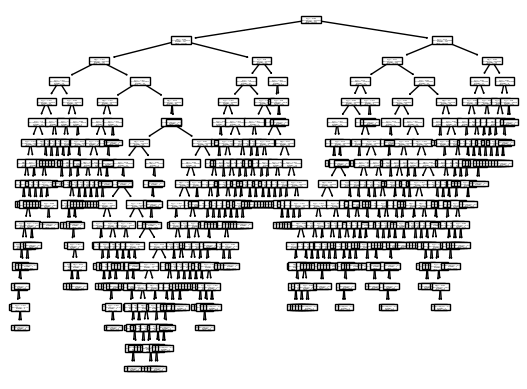

In [137]:
tree.plot_tree(dt_model1)

# For `max_depth` = 3

In [130]:
dt_model2 = DecisionTreeRegressor(max_depth=3)
dt_model2.fit(X_train, y_train)

y_train_dt2_pred = dt_model2.predict(X_train)
y_val_dt2_pred = dt_model2.predict(X_val)

dt2_results = {
    "Train R^2": r2_score(y_train, y_train_dt2_pred),
    "Validation R^2": r2_score(y_val, y_val_dt2_pred),
    "Train MAE": mean_absolute_error(y_train, y_train_dt2_pred),
    "Validation MAE": mean_absolute_error(y_val, y_val_dt2_pred),
}

print("Decision Tree (Max Depth = 3) Results:", dt2_results)


Decision Tree (Max Depth = 3) Results: {'Train R^2': 0.5095025444869563, 'Validation R^2': 0.19830582865255408, 'Train MAE': np.float64(44.25985495355638), 'Validation MAE': np.float64(48.12624849350856)}


[Text(0.5, 0.875, 'x[2] <= 0.005\nsquared_error = 6044.625\nsamples = 331\nvalue = 154.344'),
 Text(0.25, 0.625, 'x[8] <= 0.006\nsquared_error = 3735.274\nsamples = 197\nvalue = 119.787'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[8] <= -0.043\nsquared_error = 2507.936\nsamples = 140\nvalue = 101.514'),
 Text(0.0625, 0.125, 'squared_error = 1500.028\nsamples = 45\nvalue = 80.289'),
 Text(0.1875, 0.125, 'squared_error = 2670.877\nsamples = 95\nvalue = 111.568'),
 Text(0.375, 0.375, 'x[7] <= 0.09\nsquared_error = 3915.52\nsamples = 57\nvalue = 164.667'),
 Text(0.3125, 0.125, 'squared_error = 3601.615\nsamples = 54\nvalue = 159.574'),
 Text(0.4375, 0.125, 'squared_error = 696.222\nsamples = 3\nvalue = 256.333'),
 Text(0.75, 0.625, 'x[2] <= 0.073\nsquared_error = 5102.888\nsamples = 134\nvalue = 205.149'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[3] <= 0.017\nsquared_error = 4466.917\nsamples = 109\nvalue = 190.018'),
 Text(0.5625, 0.125, 'squared_error = 4228.752\n

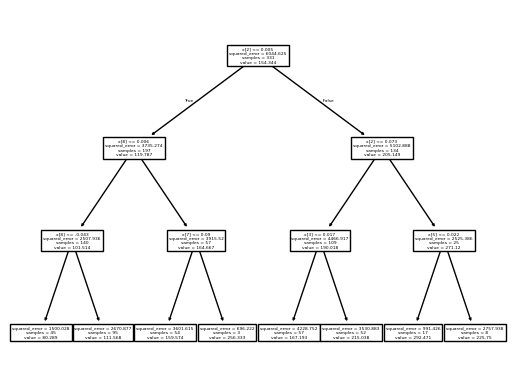

In [139]:
tree.plot_tree(dt_model2)

#    3. Two kNNs

# KNN for k=3

In [131]:
knn_model1 = KNeighborsRegressor(n_neighbors=3)
knn_model1.fit(X_train, y_train)

y_train_knn1_pred = knn_model1.predict(X_train)
y_val_knn1_pred = knn_model1.predict(X_val)

knn1_results = {
    "Train R^2": r2_score(y_train, y_train_knn1_pred),
    "Validation R^2": r2_score(y_val, y_val_knn1_pred),
    "Train MAE": mean_absolute_error(y_train, y_train_knn1_pred),
    "Validation MAE": mean_absolute_error(y_val, y_val_knn1_pred),
}

print("kNN (k=3) Results:", knn1_results)

kNN (k=3) Results: {'Train R^2': 0.6292997451197401, 'Validation R^2': 0.21418443779270424, 'Train MAE': np.float64(37.13796576032226), 'Validation MAE': np.float64(45.79545454545455)}


# knn for k=5

In [132]:
knn_model2 = KNeighborsRegressor(n_neighbors=5)
knn_model2.fit(X_train, y_train)

y_train_knn2_pred = knn_model2.predict(X_train)
y_val_knn2_pred = knn_model2.predict(X_val)

knn2_results = {
    "Train R^2": r2_score(y_train, y_train_knn2_pred),
    "Validation R^2": r2_score(y_val, y_val_knn2_pred),
    "Train MAE": mean_absolute_error(y_train, y_train_knn2_pred),
    "Validation MAE": mean_absolute_error(y_val, y_val_knn2_pred),
}

print("kNN (k=5) Results:", knn2_results)


kNN (k=5) Results: {'Train R^2': 0.5707614150639839, 'Validation R^2': 0.35848074609729985, 'Train MAE': np.float64(40.77341389728097), 'Validation MAE': np.float64(43.29090909090908)}


In [133]:
results_summary = {}

In [134]:
results_summary = pd.DataFrame({
    "Model": ["Poly Degree 2", "Poly Degree 3", "Decision Tree Default", "Decision Tree Max Depth 3", "kNN k=3", "kNN k=5"],
    "Train R^2": [results_df_1["Train R^2"], results_df_2["Train R^2"], dt1_results["Train R^2"], dt2_results["Train R^2"], knn1_results["Train R^2"], knn2_results["Train R^2"]],
    "Validation R^2": [results_df_1["Validation R^2"], results_df_2["Validation R^2"], dt1_results["Validation R^2"], dt2_results["Validation R^2"], knn1_results["Validation R^2"], knn2_results["Validation R^2"]],
    "Train MAE": [results_df_1["Train MAE"], results_df_2["Train MAE"], dt1_results["Train MAE"], dt2_results["Train MAE"], knn1_results["Train MAE"], knn2_results["Train MAE"]],
    "Validation MAE": [results_df_1["Validation MAE"], results_df_2["Validation MAE"], dt1_results["Validation MAE"], dt2_results["Validation MAE"], knn1_results["Validation MAE"], knn2_results["Validation MAE"]],
})

results_summary

,Model,Train R^2,Validation R^2,Train MAE,Validation MAE
0,Poly Degree 2,"0 0.350764 Name: Train R^2, dtype: float64","0 0.331631 Name: Validation R^2, dtype: flo...","0 52.207314 Name: Train MAE, dtype: float64","0 47.2137 Name: Validation MAE, dtype: float64"
1,Poly Degree 3,"0 0.350774 Name: Train R^2, dtype: float64","0 0.331638 Name: Validation R^2, dtype: flo...","0 52.198968 Name: Train MAE, dtype: float64","0 47.185414 Name: Validation MAE, dtype: fl..."
2,Decision Tree Default,1.0,-0.274756,0.0,58.545455
3,Decision Tree Max Depth 3,0.509503,0.198306,44.259855,48.126248
4,kNN k=3,0.6293,0.214184,37.137966,45.795455
5,kNN k=5,0.570761,0.358481,40.773414,43.290909


# Conclusion

##### Based on Part B, the optimal choices are the decision tree limited to a max_dept of 3 and the KNN with k=3, as they show superior performance in both training and validation phases.

##### It was crystal clear overfitting in decision tree with default parameters, therefore limited the depth is used for that

##### Polynomial models did predicted something to some extent, but not performed as well as decision-trees and KNN